# Наша задача - доказать , что имеет распределение Коши +
оценить параметр методом максимального правдоподобия на половине и на всей выборке

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import scipy.stats
import numpy as np
import random
import math
%matplotlib inline

Загрузим данные из файла

In [24]:
file_descriptor = open('/Users/semenfedotov/Desktop/viborkaKashi.txt')
data = file_descriptor.readlines()
data = [float(x) for x in data]

In [4]:
print len(data)

1000


Так как нам не нужно точное значение максимума функции правдоподобия, а лишь то, на чем он достигается, то мы можем пренебречь константами и считать не максимум ФП(Функции правдоподобия), а минимум у знаменателя

In [5]:
def likelyhood(theta, size) :
   return sum([math.log(((1. + (x - theta) ** 2.))) for x in data[:(size + 1)]])

Сгенерируем интервал, на котором будем производить поиск

In [6]:
dots = np.arange(-1000, 1000.01, 0.01)
dots

array([-1000.  ,  -999.99,  -999.98, ...,   999.98,   999.99,  1000.  ])

In [7]:
half = 500
full = 1000

Произведем подсчет на половине выборки

In [8]:
%time
res_half = np.argmin([likelyhood(dot, half) for dot in dots])

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.05 µs


In [10]:
res_half

78824

In [11]:
dots[78824]

-211.7600000007169

Произведем подсчет на всей выборке

In [9]:
%time
res_full = np.argmin([likelyhood(dot, full) for dot in dots])

CPU times: user 4 µs, sys: 4 µs, total: 8 µs
Wall time: 11 µs


In [12]:
res_full

78817

In [13]:
dots[78817]

-211.83000000071684

In [14]:
likelyhood(dots[78817], full)

1370.15623892849

In [15]:
likelyhood(dots[78824], half)

749.0226984165126

## А теперь построим гистограмму по нашей выборке и график плотности распределения Коши с параметром сдвига, полученным нами при оценивании методом МП

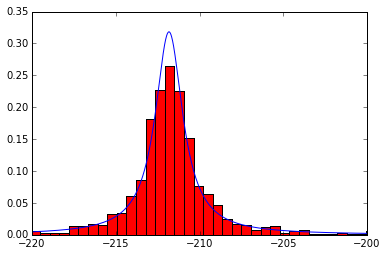

In [22]:
dots_for_pdf = np.linspace(-220, -200, 1000)
plt.hist(data, 2600, normed = 1, color = 'red')
plt.plot(dots_for_pdf, [scipy.stats.cauchy.pdf(x, -211.83000000071684) for x in dots_for_pdf], color = 'blue')
plt.xlim(-220, -200)
plt.show()

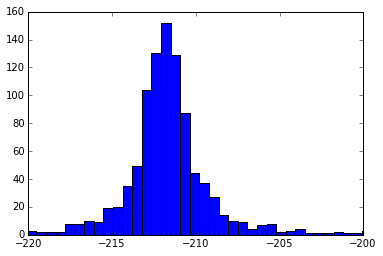

In [23]:
plt.hist(data, 2600)
plt.xlim(-220, -200)
plt.show()

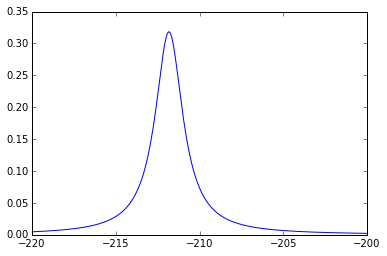

In [18]:
dots_for_pdf = np.linspace(-220, -200, 1000)
plt.plot(dots_for_pdf, [scipy.stats.cauchy.pdf(x, -211.83000000071684) for x in dots_for_pdf])
plt.show()

## -211.83000000071684 Это ответ т.е. наша оценка параметра

## Итого, на графиках видно, что гистограмма очень схожа с плотностью распределения Коши, с параметром , равным нашей оценке ММП